# Gradient Descent for Linear Regression
This notebook will show how to implement gradient descent for linear regression.

In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext(master='local',appName="Linear Regression")
spark = SparkSession(sparkContext=sc)

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# Gradient Descent in Python

### Generate data

In [3]:
size= 1000
np.random.seed(100)  # Add seed for reproducibility
x1 = np.random.rand(size)
x2 = np.random.rand(size)
theta0 = 0
theta1 = 1
theta2 = 4
x = []
for i in range(size):
    x.append(np.array([x1[i],x2[i]]))
e = np.random.rand(size)*0.2
y = theta0 + theta1*x1 + theta2*x2 + e

### Data visualisation

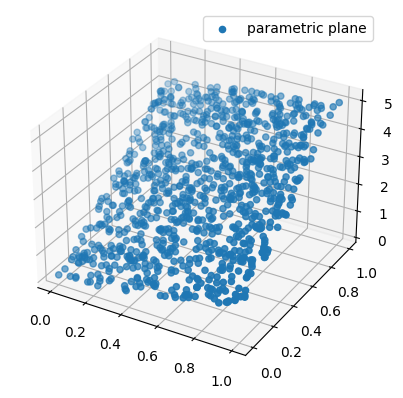

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
 
mpl.rcParams['legend.fontsize'] = 10
 
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x1, x2, y, label='parametric plane' )
ax.legend()
 
plt.show()

### Gradient Descent Algorithm in Python

In [5]:
learningRate = 1
num_iteration = 100
m_current=np.zeros(2)
n = float(size)
# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients. 
    cost = 0
    m_gradient = 0
    for j in range(size):
        y_prediction = np.dot(m_current,x[j])
        # We compute costs just for monitoring 
        cost += ( y[j] - y_prediction)**2
        # calculate gradients.
        m_gradient += x[j] * (y[j] - y_prediction)
    m_gradient = (-1.0/n)* m_gradient
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    print(i , "m=", m_current, " Cost=", cost/n)

0 m= [1.4105323  1.68081628]  Cost= 8.399195951778815
1 m= [1.9108324 2.4245381]  Cost= 1.6287020145826736
2 m= [2.05073686 2.78512632]  Cost= 0.48710814970483735
3 m= [2.05102643 2.98607815]  Cost= 0.2650096497721619
4 m= [2.00008333 3.11783199]  Cost= 0.19816650655022827
5 m= [1.93304194 3.2172274 ]  Cost= 0.1617012085725404
6 m= [1.86364325 3.29949149]  Cost= 0.1344979566089295
7 m= [1.79705285 3.371117  ]  Cost= 0.11240090351885147
8 m= [1.73501712 3.43504884]  Cost= 0.09412627371525616
9 m= [1.67793561 3.49277456]  Cost= 0.07895895500343858
10 m= [1.62569272 3.54516832]  Cost= 0.06636182805372179
11 m= [1.57798992 3.59283302]  Cost= 0.0558979365989793
12 m= [1.53447741 3.63624012]  Cost= 0.04720580167489733
13 m= [1.49480509 3.67578791]  Cost= 0.03998539036758041
14 m= [1.45864128 3.71182678]  Cost= 0.033987509240183005
15 m= [1.4256786  3.74467098]  Cost= 0.029005163559017652
16 m= [1.39563486 3.77460487]  Cost= 0.02486640706960536
17 m= [1.36825206 3.80188681]  Cost= 0.021428406

# Gradient Descent in PySpark

## Gradient Descent Algorithm
### Linear Regression Model (No Intercept)

The linear regression model without an intercept term can be represented as:

$$
y = \theta_1x_1 + \theta_2x_2 + \theta_3x_3
$$

Here's a breakdown of the variables:
- $y$ is the dependent variable or the target variable we want to predict.
- $x_1$, $x_2$, and $x_3$ are the three input variables.
- $\theta_1$, $\theta_2$, and $\theta_3$ are the coefficients of the model.

### Cost Function

To estimate the coefficients, we need a cost function that measures the error between the actual values and the predicted values. For linear regression, we commonly use the mean squared error (MSE) as the cost function. The MSE is defined as:

$$
L(\theta_1, \theta_2, \theta_3) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (\theta_1x_{1i} + \theta_2x_{2i} + \theta_3x_{3i}))^2
$$

Here, $n$ represents the number of data points in our dataset, and $y_i$, $x_{1i}$, $x_{2i}$, and $x_{3i}$ are the values of the target variable and input variables for the i-th data point.

### Gradient Descent

Gradient descent is an iterative optimization algorithm used to minimize the cost function and find the optimal coefficients. Here's an overview of the steps involved:

1. Initialize the coefficients $\theta_1$, $\theta_2$, and $\theta_3$ with random values or zeros.
2. Set the learning rate $\alpha$, which controls the step size in each iteration.
3. Repeat the following steps until convergence:
- Calculate the gradient of the cost function with respect to each coefficient:
$$
     \frac{\partial L}{\partial \theta_j} = \frac{-1}{n} \sum_{i=1}^{n} x_{ji}(y_i - (\theta_1x_{1i} + \theta_2x_{2i} + \theta_3x_{3i}))
$$

- Update the coefficients simultaneously:
$$
\theta_j = \theta_j - \alpha \frac{\partial L}{\partial \theta_j}
$$
## Interpretation of Coefficients

Once gradient descent converges and finds the optimal coefficients, we can interpret them as follows:

- $\theta_1$ represents the change in the dependent variable for a one-unit increase in $x_1$, assuming $x_2$ and $x_3$ are held constant.
- $\theta_2$ represents the change in the dependent variable for a one-unit increase in $x_2$, assuming $x_1$ and $x_3$ are held constant.
- $\theta_3$ represents the change in the dependent variable for a one-unit increase in $x_3$, assuming $x_1$ and $x_2$ are held constant.

### Generate data
- Data range infulence the learning rate (Try to change scale_x)

In [27]:
#Data set parameters
size  = 100 # Size of input data
scale_x = 1 # Scaling of the input data (default range is [0,1])
d = 3 # Dimensionality of the input data
theta = [-1,1,2] # The parameters of the model
error_rate = 0.1

# Create random input varaiables
x = np.random.rand(size,d)
# Scale the input space
x = x*scale_x
# Generate errors for each sample
e = np.random.rand(size)*scale_x*error_rate
# Create the data
data = []
for i in range(size):
    # Calculate the target variable
    y = np.dot(theta,x[i]) +e[i]
    # Create a tuple (target_variable, array[input_varaiables]) 
    data.append((y,x[i]))


myRDD = sc.parallelize(data)
myRDD.cache()
myRDD.take(3)

[(0.8405685163566492, array([0.99873294, 0.31657033, 0.75553722])),
 (0.9346874996871882, array([0.8223669 , 0.22319453, 0.7463313 ])),
 (0.6722662632551306, array([0.73817669, 0.66455257, 0.36949326]))]

In [28]:
learningRate = 1.1
num_iteration = 30

# Calculate the dimensionality of the inpit data
d_input = len(myRDD.first()[1])
theta = np.zeros(d_input)
print(f"Input dimensionalyty is {d_input} and we start wiht {theta} as parameters ")

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    gradientAndCost=myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1] , theta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 ))\
                           .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientAndCost[1]/(2*size)
    gradient=(-1/float(size))* gradientAndCost[0]
    theta = theta - learningRate * gradient
    print(f"{i} Cost={cost:.5f} theta={theta}")

Input dimensionalyty is 3 and we start wiht [0. 0. 0.] as parameters 
0 Cost=0.77033 theta=[0.52065531 0.56167849 0.79974776]
1 Cost=0.14924 theta=[0.46052845 0.63065547 0.96581014]
2 Cost=0.12186 theta=[0.35421342 0.65324247 1.06411193]
3 Cost=0.10317 theta=[0.25139265 0.67134195 1.14869196]
4 Cost=0.08742 theta=[0.15613048 0.68879167 1.22530853]
5 Cost=0.07412 theta=[0.06824331 0.70586506 1.2951102 ]
6 Cost=0.06287 theta=[-0.0128078   0.72251779  1.35875489]
7 Cost=0.05336 theta=[-0.08755415  0.73869089  1.41680318]
8 Cost=0.04532 theta=[-0.15648844  0.75433716  1.46976026]
9 Cost=0.03851 theta=[-0.22006488  0.76942164  1.51808424]
10 Cost=0.03274 theta=[-0.27870196  0.78392001  1.56219092]
11 Cost=0.02786 theta=[-0.33278529  0.79781692  1.6024578 ]
12 Cost=0.02372 theta=[-0.38267016  0.81110458  1.63922774]
13 Cost=0.02022 theta=[-0.42868399  0.8237815   1.67281215]
14 Cost=0.01724 theta=[-0.4711285   0.83585138  1.70349402]
15 Cost=0.01472 theta=[-0.51028175  0.8473222   1.73153053

### Linear Regression Model (With Intercept)

The linear regression model with an intercept term $\theta_0$ can be represented as:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
$$

Here, $\theta_0$ is the intercept term, representing the value of $y$ when all input variables are zero.

### Modified Cost Function

The mean squared error (MSE) for the cost function now becomes:

$$
L(\theta_0, \theta_1, \theta_2, \theta_3) = \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - (\theta_0 + \theta_1 x_{1i} + \theta_2 x_{2i} + \theta_3 x_{3i}) \right)^2
$$

### Modified Gradient Descent

The steps in the gradient descent algorithm would be as follows:

1. Initialize the coefficients $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$ with random values or zeros.
2. Set the learning rate $\alpha$.

Repeat the following steps until convergence:

- Calculate the gradients of the cost function as follows:

$$
\frac{\partial L}{\partial \theta_0} = \frac{-1}{n} \sum_{i=1}^{n} \left( y_i - (\theta_0 + \theta_1 x_{1i} + \theta_2 x_{2i} + \theta_3 x_{3i}) \right)
$$

$$
\frac{\partial L}{\partial \theta_j} = \frac{-1}{n} \sum_{i=1}^{n} x_{ji} \left( y_i - (\theta_0 + \theta_1 x_{1i} + \theta_2 x_{2i} + \theta_3 x_{3i}) \right) , \quad \text{for} \; j=1,2,3
$$

- Update the coefficients simultaneously:

$$
\theta_j = \theta_j - \alpha \frac{\partial L}{\partial \theta_j} , \quad \text{for} \; j=0,1,2,3
$$

### Interpretation of Modified Coefficients

- $\theta_0$ is the estimated value of the dependent variable when all the predictors are zero.
- $\theta_1$, $\theta_2$, $\theta_3$ have similar interpretations as before, but they are adjusted for the presence of $\theta_0$ and other variables.

The introduction of the intercept term $\theta_0$ allows the model to better capture the relationship between the dependent variable and the predictors, thereby enhancing its predictive accuracy.

In [42]:
#Data set parameters
size  = 10000 # Size of input data
scale_x = 1 # Scaling of the input data (default range is [0,1])
d = 3 # Dimensionality of the input data
theta = [-1,1,2] # The parameters of the model
theta0 = 5 # The intercept value
error_rate = 0.1

# Create random input varaiables
x = np.random.rand(size,d)
# Scale the input space
x = x*scale_x
# Generate errors for each sample
e = np.random.rand(size)*scale_x*error_rate
# Create the data
data = []
for i in range(size):
    # Calculate the target variable
    y = np.dot(theta,x[i]) + theta0 +e[i]
    # Create a tuple (target_variable, array[input_varaiables]) 
    data.append((y,x[i]))


myRDD = sc.parallelize(data)
# Needed for intercept calculation
myRDD= myRDD.map(lambda x: (x[0],np.append(1, x[1] )))
myRDD.cache()
myRDD.take(3)

[(7.378583381059497, array([1.        , 0.26986741, 0.91226397, 0.83125419])),
 (6.051517029332505, array([1.        , 0.23033234, 0.80486277, 0.22586211])),
 (6.018097871007342, array([1.        , 0.67745566, 0.51896613, 0.56656307]))]

In [44]:
learningRate = 1
num_iteration = 30

# Calculate the dimensionality of the inpit data
d_input = len(myRDD.first()[1])
theta = np.zeros(d_input)
print(f"Input dimensionalyty is {d_input} and we start wiht {theta} as parameters ")

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    gradientAndCost=myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1] , theta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 ))\
                           .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientAndCost[1]/(2*size)
    gradient=(-1/float(size))* gradientAndCost[0]
    theta = theta - learningRate * gradient
    print(f"{i} Cost={cost:.5f} theta={theta}")

Input dimensionalyty is 4 and we start wiht [0. 0. 0. 0.] as parameters 
0 Cost=18.51604 theta=[6.04466054 2.9368973  3.11767243 3.16260436]
1 Cost=11.46728 theta=[1.44458858 0.31400249 0.63103489 0.78287386]
2 Cost=7.12451 theta=[5.18279825 2.07282305 2.53812108 2.73675999]
3 Cost=4.44617 theta=[2.37816071 0.41811144 1.00125893 1.28322483]
4 Cost=2.79197 theta=[4.69679109 1.45920596 2.16477716 2.49169723]
5 Cost=1.76821 theta=[2.99349965 0.405292   1.21202029 1.60502443]
6 Cost=1.13283 theta=[4.43777632 1.01067378 1.91900816 2.35330299]
7 Cost=0.73693 theta=[3.40946406 0.33095243 1.32565597 1.81311368]
8 Cost=0.48888 theta=[4.31463511 0.67317004 1.75252981 2.27689041]
9 Cost=0.33229 theta=[3.69944691 0.22767577 1.38050285 1.94812215]
10 Cost=0.23244 theta=[4.27170185 0.41211873 1.63568574 2.235707  ]
11 Cost=0.16788 theta=[3.90886819 0.11423447 1.4001285  2.03566361]
12 Cost=0.12542 theta=[4.27506838 0.20511522 1.55024993 2.21389714]
13 Cost=0.09687 theta=[4.06592805e+00 1.09754130e-0